In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import and Clean Data

In [2]:
# import fitbit download json file
df = pd.read_json (r'C:\Users\spice\Documents\Fitbit\AndrewJamieson\Physical Activity\heart_rate-2020-12-10.json')
df.head()

,dateTime,value
0,2020-12-10 08:00:01,"{'bpm': 65, 'confidence': 3}"
1,2020-12-10 08:00:06,"{'bpm': 63, 'confidence': 3}"
2,2020-12-10 08:00:16,"{'bpm': 64, 'confidence': 3}"
3,2020-12-10 08:00:21,"{'bpm': 68, 'confidence': 3}"
4,2020-12-10 08:00:26,"{'bpm': 73, 'confidence': 3}"


In [3]:
# new dataframe with value split into columns
df2 = pd.concat([df.drop(['value'], axis=1), df['value'].apply(pd.Series)], axis=1)

In [4]:
# adjust timezone from UTC to PST (note standard time only, need to change for daylight saving)
df2['PST'] = df2.dateTime + timedelta(hours = -8)

In [5]:
# split out day, hours, mins, secs
df2['date'] = df2.PST.dt.date
df2['hours'] = df2.PST.dt.hour
df2['minutes'] = df2.PST.dt.minute
df2['seconds'] = df2.PST.dt.second

In [6]:
df2.head()

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds
0,2020-12-10 08:00:01,65,3,2020-12-10 00:00:01,2020-12-10,0,0,1
1,2020-12-10 08:00:06,63,3,2020-12-10 00:00:06,2020-12-10,0,0,6
2,2020-12-10 08:00:16,64,3,2020-12-10 00:00:16,2020-12-10,0,0,16
3,2020-12-10 08:00:21,68,3,2020-12-10 00:00:21,2020-12-10,0,0,21
4,2020-12-10 08:00:26,73,3,2020-12-10 00:00:26,2020-12-10,0,0,26


In [7]:
# find maximum heartrate, idx for index, double brackets to return result as a row vs series
print(f'Maximum heartrate is {df2.bpm.max()}')
max_idx = df2.bpm.idxmax()
df2.iloc[[max_idx]]

Maximum heartrate is 200


,dateTime,bpm,confidence,PST,date,hours,minutes,seconds
7420,2020-12-11 00:46:21,200,1,2020-12-10 16:46:21,2020-12-10,16,46,21


In [8]:
# avearge heart rate
df2.bpm.mean()

67.35415282392026

In [9]:
print(f'Minimum heartrate is {df2.bpm.min()}')
min_idx = df2.bpm.idxmin()
df2.iloc[[min_idx]]

Minimum heartrate is 47


,dateTime,bpm,confidence,PST,date,hours,minutes,seconds
4494,2020-12-10 17:11:02,47,3,2020-12-10 09:11:02,2020-12-10,9,11,2


In [10]:
age = 40
max_hr_basic = 220 - age
max_hr_tanaka = 208 - 0.7 * age

print(max_hr_basic)
print(max_hr_tanaka)
# Note: However, these measures are over simplistic 
# Less accurate for both younger and older people, 
# Does not consider variables specific to you / your genetics.

180
180.0


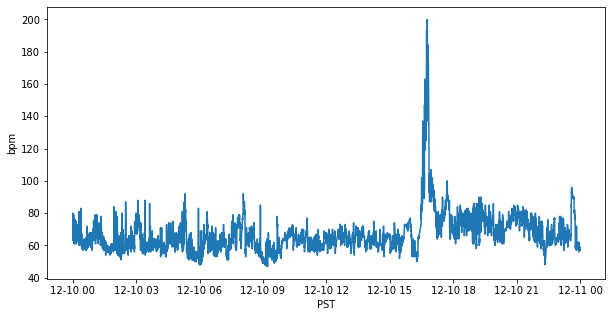

In [51]:
# 24 hour heart rate for Dec-10, 
f, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='PST', y='bpm', data=df2);

### Workout Dataframe

In [12]:
workout_df = df2[(df2['PST'] > '2020-12-10 16:28:00') & (df2['PST'] < '2020-12-10 16:53:00')]

In [13]:
workout_df

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds
7195,2020-12-11 00:28:17,73,1,2020-12-10 16:28:17,2020-12-10,16,28,17
7196,2020-12-11 00:28:32,73,1,2020-12-10 16:28:32,2020-12-10,16,28,32
7197,2020-12-11 00:28:47,73,1,2020-12-10 16:28:47,2020-12-10,16,28,47
7198,2020-12-11 00:29:02,73,1,2020-12-10 16:29:02,2020-12-10,16,29,2
7199,2020-12-11 00:29:07,77,0,2020-12-10 16:29:07,2020-12-10,16,29,7
...,...,...,...,...,...,...,...,...
7487,2020-12-11 00:52:22,94,2,2020-12-10 16:52:22,2020-12-10,16,52,22
7488,2020-12-11 00:52:31,94,2,2020-12-10 16:52:31,2020-12-10,16,52,31
7489,2020-12-11 00:52:36,92,2,2020-12-10 16:52:36,2020-12-10,16,52,36
7490,2020-12-11 00:52:41,90,2,2020-12-10 16:52:41,2020-12-10,16,52,41


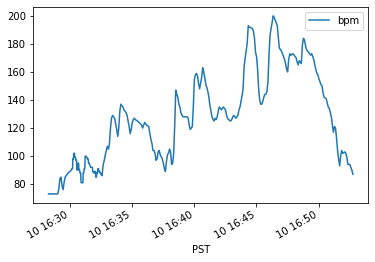

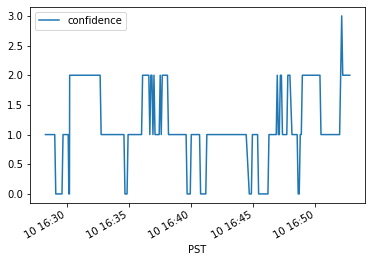

In [14]:
workout_df.plot(x ='PST', y='bpm', kind = 'line');
workout_df.plot(x ='PST', y='confidence', kind = 'line');

In [15]:
# Workout from 12-10 4:28 to 4:48, with 5 minute cool down
# Note: low confidence for all of the workout. The only high level of confidence (3) is during the cooldown 

### Create Dataframe about Max Heart Rate

In [16]:
# new df where heart rate is greater than max hr
df3 = df2.loc[df2['bpm'] > max_hr_basic]

In [17]:
# make new column from df2 index
df3 = df3.assign(original_index = df3.index)

In [18]:
# reset index to avoid copy warning
df3 = df3.reset_index(drop=True)

In [19]:
# group consecutive time stamps together, start by measuring the difference between each index
# want consecutive rows to measure total time above max heart rate
df3['change'] = (df3['original_index'] - df3['original_index'].shift(1) )

In [20]:
# loop through df. If change increment is not 1, start a new group

result = []
grp = 0
for value in df3["change"]: 
    if value != 1.0: 
        grp += 1
        result.append(grp) 
    else: 
        result.append(grp) 
       
df3["group2"] = result    

In [21]:
# dataframe with all measurements above max heart rate
df3

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds,original_index,change,group2
0,2020-12-11 00:44:16,181,1,2020-12-10 16:44:16,2020-12-10,16,44,16,7397,NaN,1
1,2020-12-11 00:44:21,193,1,2020-12-10 16:44:21,2020-12-10,16,44,21,7398,1.0,1
2,2020-12-11 00:44:26,192,1,2020-12-10 16:44:26,2020-12-10,16,44,26,7399,1.0,1
3,2020-12-11 00:44:41,191,0,2020-12-10 16:44:41,2020-12-10,16,44,41,7400,1.0,1
4,2020-12-11 00:44:46,189,0,2020-12-10 16:44:46,2020-12-10,16,44,46,7401,1.0,1
5,2020-12-11 00:44:51,184,0,2020-12-10 16:44:51,2020-12-10,16,44,51,7402,1.0,1
6,2020-12-11 00:46:06,186,0,2020-12-10 16:46:06,2020-12-10,16,46,6,7417,15.0,2
7,2020-12-11 00:46:11,191,0,2020-12-10 16:46:11,2020-12-10,16,46,11,7418,1.0,2
8,2020-12-11 00:46:16,195,1,2020-12-10 16:46:16,2020-12-10,16,46,16,7419,1.0,2
9,2020-12-11 00:46:21,200,1,2020-12-10 16:46:21,2020-12-10,16,46,21,7420,1.0,2


#### Start and Finish time above max heart rate

In [22]:
# find start and finish time using max and min
result = df3.groupby('group2').agg({'PST': ['min', 'max']})
result

PST                    
                       min                 max
group2                                        
1      2020-12-10 16:44:16 2020-12-10 16:44:51
2      2020-12-10 16:46:06 2020-12-10 16:46:46
3      2020-12-10 16:48:47 2020-12-10 16:48:52

In [23]:
# difference between start and finish
result['diff'] = result.PST['max']-result.PST['min']

In [24]:
result

PST                                diff
                       min                 max                
group2                                                        
1      2020-12-10 16:44:16 2020-12-10 16:44:51 0 days 00:00:35
2      2020-12-10 16:46:06 2020-12-10 16:46:46 0 days 00:00:40
3      2020-12-10 16:48:47 2020-12-10 16:48:52 0 days 00:00:05

In [25]:
# total time above maximum heart rate as time delta
difference = result['diff'].sum()
difference

Timedelta('0 days 00:01:20')

In [26]:
# total minutes above maximum heart rate (as a decimal)
minutes = difference.total_seconds() / 60
minutes

1.3333333333333333

#### Start and Finish time above max heart rate - alternative group by method

In [27]:
result2 = df3.groupby('group2')['PST'].agg(['max','min'])

In [28]:
result2

,max,min
group2,,
1,2020-12-10 16:44:51,2020-12-10 16:44:16
2,2020-12-10 16:46:46,2020-12-10 16:46:06
3,2020-12-10 16:48:52,2020-12-10 16:48:47


In [29]:
result2['diff'] = result2['max']-result2['min']

In [30]:
result2

,max,min,diff
group2,,,
1,2020-12-10 16:44:51,2020-12-10 16:44:16,0 days 00:00:35
2,2020-12-10 16:46:46,2020-12-10 16:46:06,0 days 00:00:40
3,2020-12-10 16:48:52,2020-12-10 16:48:47,0 days 00:00:05


In [31]:
# total time above maximum heart rate
difference2 = result2['diff'].sum()
minutes = difference2.total_seconds() / 60
minutes

1.3333333333333333

#### Summary

In [32]:
# Only 1 minute and 20 seconds above max heart rate. Also at very low confidence, so probably ok.

### Create Dataframe about 90% of Max HR

In [33]:
# new df where heart rate is greater than 90% of max hr
df4 = df2.loc[df2['bpm'] > (max_hr_basic *.9)]
df4 = df4.assign(original_index = df4.index)
df4 = df4.reset_index(drop=True)
df4['change'] = (df4['original_index'] - df4['original_index'].shift(1) )

result = []
grp = 0
for value in df4["change"]: 
    if value != 1.0: 
        grp += 1
        result.append(grp) 
    else: 
        result.append(grp) 
       
df4["group2"] = result    

In [34]:
df4

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds,original_index,change,group2
0,2020-12-11 00:40:41,163,1,2020-12-10 16:40:41,2020-12-10,16,40,41,7356,NaN,1
1,2020-12-11 00:44:01,164,1,2020-12-10 16:44:01,2020-12-10,16,44,1,7394,38.0,2
2,2020-12-11 00:44:06,170,1,2020-12-10 16:44:06,2020-12-10,16,44,6,7395,1.0,2
3,2020-12-11 00:44:11,175,1,2020-12-10 16:44:11,2020-12-10,16,44,11,7396,1.0,2
4,2020-12-11 00:44:16,181,1,2020-12-10 16:44:16,2020-12-10,16,44,16,7397,1.0,2
5,2020-12-11 00:44:21,193,1,2020-12-10 16:44:21,2020-12-10,16,44,21,7398,1.0,2
6,2020-12-11 00:44:26,192,1,2020-12-10 16:44:26,2020-12-10,16,44,26,7399,1.0,2
7,2020-12-11 00:44:41,191,0,2020-12-10 16:44:41,2020-12-10,16,44,41,7400,1.0,2
8,2020-12-11 00:44:46,189,0,2020-12-10 16:44:46,2020-12-10,16,44,46,7401,1.0,2
9,2020-12-11 00:44:51,184,0,2020-12-10 16:44:51,2020-12-10,16,44,51,7402,1.0,2


#### Start and Finish time above 90% of max heart rate

In [35]:
result3 = df4.groupby('group2')['PST'].agg(['max','min'])
result3

,max,min
group2,,
1,2020-12-10 16:40:41,2020-12-10 16:40:41
2,2020-12-10 16:45:01,2020-12-10 16:44:01
3,2020-12-10 16:47:21,2020-12-10 16:46:01
4,2020-12-10 16:49:42,2020-12-10 16:47:36


In [36]:
result3['diff'] = result3['max']-result3['min']
result3

,max,min,diff
group2,,,
1,2020-12-10 16:40:41,2020-12-10 16:40:41,0 days 00:00:00
2,2020-12-10 16:45:01,2020-12-10 16:44:01,0 days 00:01:00
3,2020-12-10 16:47:21,2020-12-10 16:46:01,0 days 00:01:20
4,2020-12-10 16:49:42,2020-12-10 16:47:36,0 days 00:02:06


In [37]:
# total time above maximum heart rate
difference3 = result3['diff'].sum()
print(difference3)
minutes = difference3.total_seconds() / 60
print(minutes)

0 days 00:04:26
4.433333333333334


4 minutes 20 seconds above 90% of max heart rate

### Create Dataframe about 80% of Max HR

In [38]:
# new df where heart rate is greater than 90% of max hr
df5 = df2.loc[df2['bpm'] > (max_hr_basic *.8)]
df5 = df5.assign(original_index = df5.index)
df5 = df5.reset_index(drop=True)
df5['change'] = (df5['original_index'] - df5['original_index'].shift(1) )

result = []
grp = 0
for value in df5["change"]: 
    if value != 1.0: 
        grp += 1
        result.append(grp) 
    else: 
        result.append(grp) 
       
df5["group2"] = result    

In [39]:
df5.tail()

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds,original_index,change,group2
75,2020-12-11 00:50:02,155,2,2020-12-10 16:50:02,2020-12-10,16,50,2,7461,1.0,4
76,2020-12-11 00:50:07,153,2,2020-12-10 16:50:07,2020-12-10,16,50,7,7462,1.0,4
77,2020-12-11 00:50:12,151,2,2020-12-10 16:50:12,2020-12-10,16,50,12,7463,1.0,4
78,2020-12-11 00:50:17,150,2,2020-12-10 16:50:17,2020-12-10,16,50,17,7464,1.0,4
79,2020-12-11 00:50:22,145,2,2020-12-10 16:50:22,2020-12-10,16,50,22,7465,1.0,4


#### Start and Finish time above 90% of max heart rate

In [40]:
result4 = df5.groupby('group2')['PST'].agg(['max','min'])
result4

,max,min
group2,,
1,2020-12-10 16:38:31,2020-12-10 16:38:31
2,2020-12-10 16:41:06,2020-12-10 16:40:01
3,2020-12-10 16:45:11,2020-12-10 16:43:56
4,2020-12-10 16:50:22,2020-12-10 16:45:51


In [41]:
result4['diff'] = result4['max']-result4['min']
result4

,max,min,diff
group2,,,
1,2020-12-10 16:38:31,2020-12-10 16:38:31,0 days 00:00:00
2,2020-12-10 16:41:06,2020-12-10 16:40:01,0 days 00:01:05
3,2020-12-10 16:45:11,2020-12-10 16:43:56,0 days 00:01:15
4,2020-12-10 16:50:22,2020-12-10 16:45:51,0 days 00:04:31


In [42]:
# total time above maximum heart rate
difference4 = result4['diff'].sum()
print(difference4)
minutes = difference4.total_seconds() / 60
print(minutes)

0 days 00:06:51
6.85


6 minutes 51 seconds above 80% of max heart rate

### Plot Workout with HR zones

In [43]:
workout_df.head()

,dateTime,bpm,confidence,PST,date,hours,minutes,seconds
7195,2020-12-11 00:28:17,73,1,2020-12-10 16:28:17,2020-12-10,16,28,17
7196,2020-12-11 00:28:32,73,1,2020-12-10 16:28:32,2020-12-10,16,28,32
7197,2020-12-11 00:28:47,73,1,2020-12-10 16:28:47,2020-12-10,16,28,47
7198,2020-12-11 00:29:02,73,1,2020-12-10 16:29:02,2020-12-10,16,29,2
7199,2020-12-11 00:29:07,77,0,2020-12-10 16:29:07,2020-12-10,16,29,7


In [44]:
print(max_hr_basic *.9)
print(max_hr_basic *.8)

162.0
144.0


In [45]:
conditions  = [ workout_df['bpm'] >= 180, (workout_df['bpm'] < 180) & (workout_df['bpm']>= 162), 
               (workout_df['bpm'] < 162) & (workout_df['bpm']>= 144), workout_df['bpm'] < 144 ]
choices     = [ "max", '90%', '80%', 'under_80%' ]
    
workout_df['zones'] = np.select(conditions, choices, default=np.nan)

C:\Users\spice\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


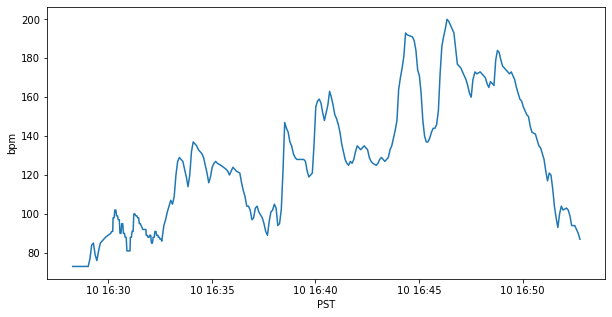

In [47]:
# basic line chart
f, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='PST', y='bpm', data=workout_df);

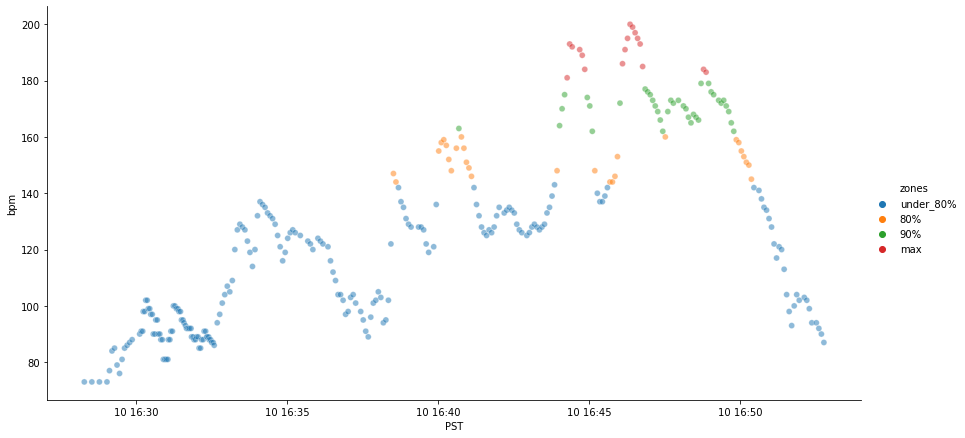

In [48]:
# scatter chart with hr zones
sns.relplot(x="PST", y="bpm", hue="zones", alpha=.5, height=6, aspect=2, data=workout_df);